In [23]:
from __future__ import print_function
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import KFold

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("VinhoVerde_WhiteWineQuality.csv", sep=';')
df.head()



,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Loaded the wine data in 'df'

In [24]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


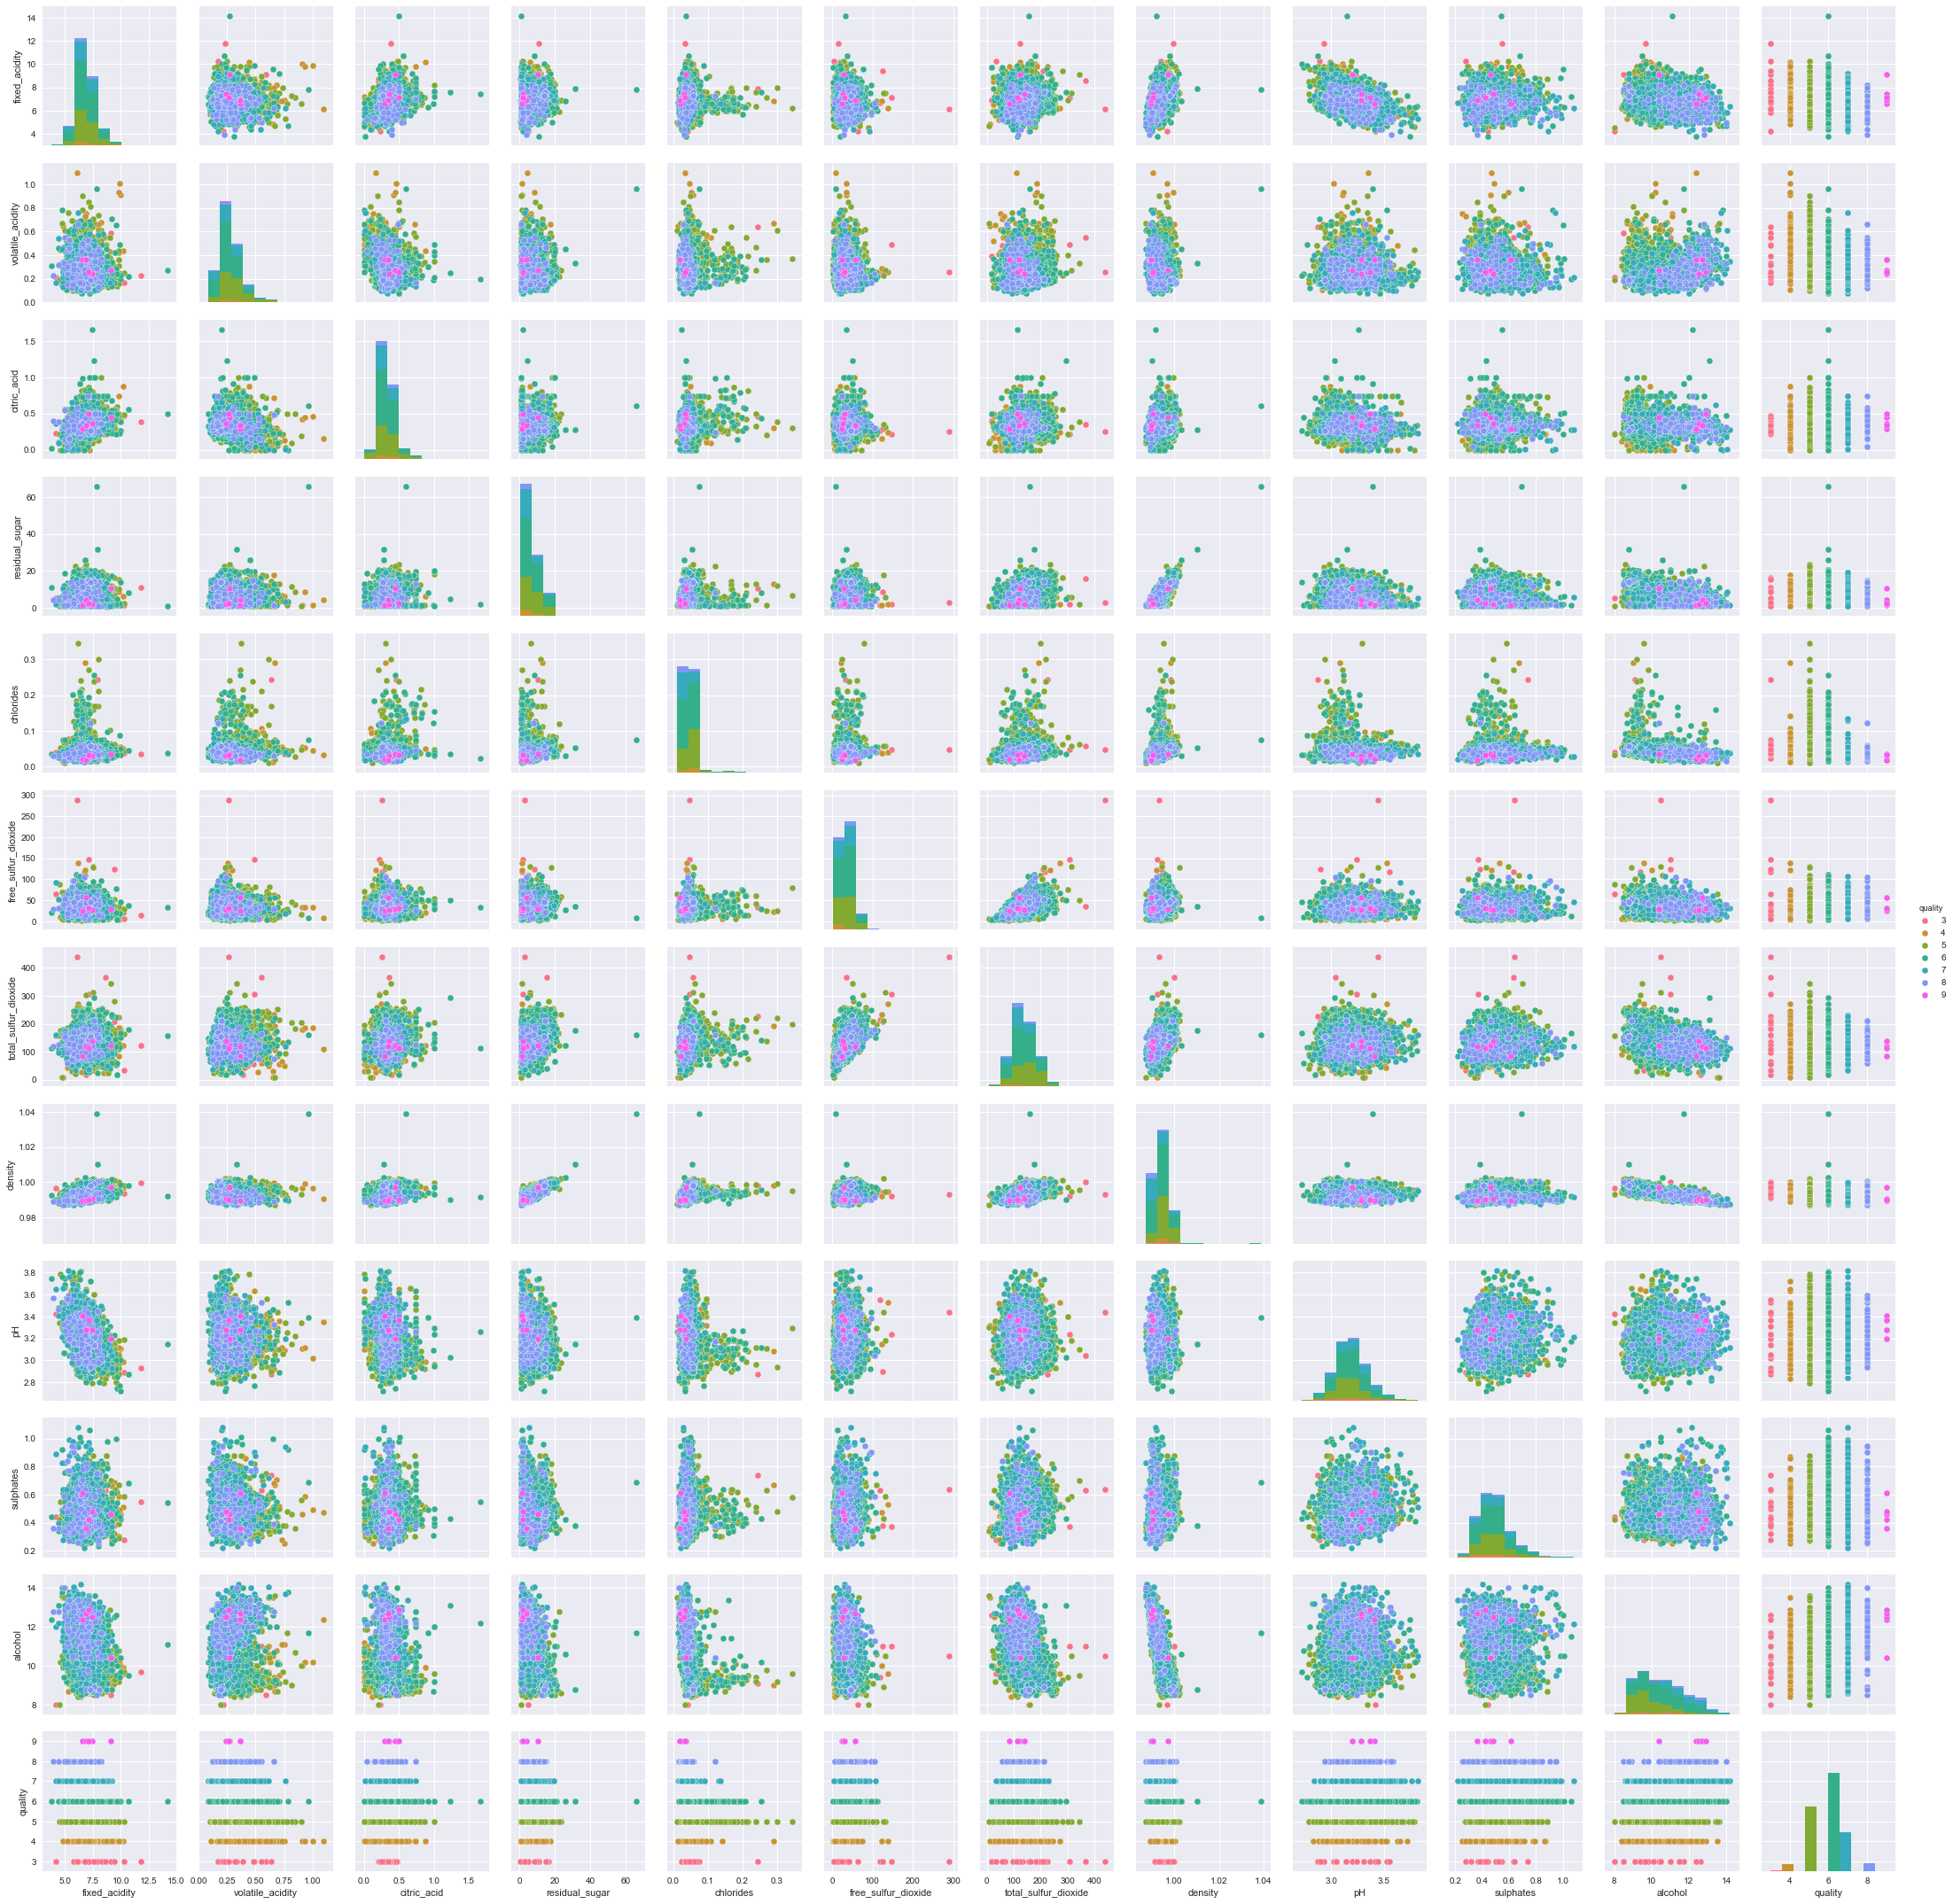

In [25]:
sns.pairplot(df, hue="quality")
sns.plt.show()

The pairplot show correlation of every column on every other column. As we know wine depends greatly on alcohol and density, and the pairplot above also shows the same result, there fore we will move forward with these 2.

### Single Variable Linear Regression

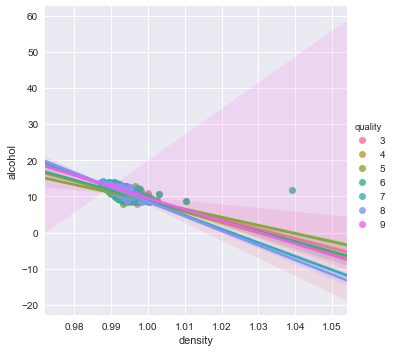

In [26]:
sns.lmplot(y="alcohol", x="density", data=df,  hue="quality")
sns.plt.show()

Now that we have seen the correlation and the significant relation, we will move forward and slit our datset to fit it with linear regression model.

In [27]:
from sklearn.cross_validation import train_test_split
X = df[["density"]]
Y = df[["alcohol"]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20 , random_state = 0)

In [28]:
model = LinearRegression()
results = model.fit(X_train.values.reshape(len(X_train),1), Y_train)

Y_predictor=model.predict(X_train.values.reshape(len(X_train),1))
print (Y_predictor)
#print (results.intercept_, results.coef_)

[[  9.64255938]
 [ 12.22523991]
 [ 11.3137056 ]
 ..., 
 [  5.01736679]
 [  9.98691678]
 [ 10.7397766 ]]


In [29]:
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                alcohol   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 3.433e+05
Date:                Wed, 18 Oct 2017   Prob (F-statistic):               0.00
Time:                        21:09:04   Log-Likelihood:                -8063.7
No. Observations:                4898   AIC:                         1.613e+04
Df Residuals:                    4897   BIC:                         1.614e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
density       10.5744      0.018    585.958      0.000      10.539      10.610
==============================================================================
Omnibus:                      437.383   Durbin-Watson:                   1.503
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              289.129
Skew:                           0.478   Prob(JB):                     1.65e-63
Kurtosis:                       2.291   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can see from the above stats, R-square value of 0.98 means our data has fit the model pretty well, whereas p value of 0 depicts that the possiblity of a null hypothesis being true is 0, i.e Hnull for this model is 0.

In [30]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  density    10.574441
dtype: float64
R2:  0.985938009539


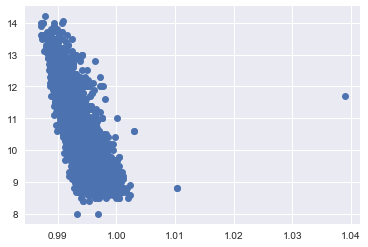

In [31]:
X = df[["density"]]
y = df[["alcohol"]]
plt.plot(X, y, "o")

The plot shows a negative relation between alcohol and density.

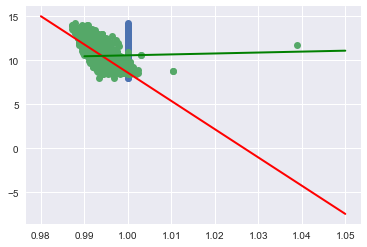

In [32]:
X = sm.add_constant(X) #  Our model needs an intercept so we add a column of 1s:
plt.plot(X, y, "o")
x2 = np.linspace(0.98, 1.05, 51)
y2 = 329.588 + (-320.991*x2)
plt.plot(x2, y2, lw=2, color="r")
x2 = np.linspace(0.99, 1.05, 31)
y2 = (10.574*x2)
plt.plot(x2, y2, lw=2, color="g")
plt.show()

this plot shows us the regression line and our mean line.
Now again after consulting the pairplot above we have picked chlorides, pH and density to plot with alcohol, for the multiple linear regression model.

### Multiple Variable Linear Regression

In [33]:
from sklearn.cross_validation import train_test_split
Xpoly = df[["density","chlorides","pH"]].values
Ypoly = df[["alcohol"]].values
X_trainpoly, X_testpoly, Y_trainpoly, Y_testpoly = train_test_split(Xpoly, Ypoly, test_size = .20 , random_state = 0)
print(X_trainpoly)

[[ 0.9966   0.062    3.23   ]
 [ 0.98895  0.029    3.28   ]
 [ 0.99165  0.027    3.26   ]
 ..., 
 [ 1.0103   0.053    3.15   ]
 [ 0.99558  0.024    3.13   ]
 [ 0.99335  0.049    3.09   ]]


In [34]:
from sklearn.cross_validation import train_test_split

modelpoly = LinearRegression()
polyresults = modelpoly.fit(X_trainpoly, Y_trainpoly)

Y_predictorpoly=modelpoly.predict(X_trainpoly)
print (Y_predictorpoly)


#print (results.intercept_, results.coef_)

[[  9.55764131]
 [ 12.30570598]
 [ 11.458348  ]
 ..., 
 [  5.25348039]
 [ 10.19872453]
 [ 10.67268649]]


In [35]:
modelpoly = sm.OLS(y, X)
polyresults = modelpoly.fit()
polyresults.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                alcohol   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     7613.
Date:                Wed, 18 Oct 2017   Prob (F-statistic):               0.00
Time:                        21:09:05   Log-Likelihood:                -5668.6
No. Observations:                4898   AIC:                         1.134e+04
Df Residuals:                    4896   BIC:                         1.135e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        329.5878      3.657     90.130      0.000     322.419     336.757
density     -320.9907      3.679    -87.255      0.000    -328.203    -313.779
==============================================================================
Omnibus:                     2842.298   Durbin-Watson:                   1.700
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           244340.861
Skew:                           1.906   Prob(JB):                         0.00
Kurtosis:                      37.391   Cond. No.                         665.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The r-square displays a pretty good fit for our multiple linear reg. model.
The null hypothesis assumption is here also nullified with p value of 0.

Now we shall check the accuracy of our model, by root mean square error value (rmse).

### Accuracy Check : RMSE

In [36]:
y_null = np.zeros_like(Y_testpoly, dtype=float)
y_null.fill(Y_testpoly.mean())
y_null[0:33]

array([[ 10.49702721],
       [ 10.49702721],
       [ 10.49702721],
       [ 10.49702721],
       [ 10.49702721],
       [ 10.49702721],
       [ 10.49702721],
       [ 10.49702721],
       [ 10.49702721],
       [ 10.49702721],
       [ 10.49702721],
       [ 10.49702721],
       [ 10.49702721],
       [ 10.49702721],
       [ 10.49702721],
       [ 10.49702721],
       [ 10.49702721],
       [ 10.49702721],
       [ 10.49702721],
       [ 10.49702721],
       [ 10.49702721],
       [ 10.49702721],
       [ 10.49702721],
       [ 10.49702721],
       [ 10.49702721],
       [ 10.49702721],
       [ 10.49702721],
       [ 10.49702721],
       [ 10.49702721],
       [ 10.49702721],
       [ 10.49702721],
       [ 10.49702721],
       [ 10.49702721]])

In [37]:
from sklearn import metrics

y_null_rmse =np.sqrt(metrics.mean_squared_error(Y_testpoly, y_null))
y_null_rmse

1.2197541132397285

In [38]:
y_null_rmse/Y_testpoly.mean()

0.11619995725789556

We have a rmse value as 1.2, lets do regularization to improve our model via ridge regression.

### Regularization : Ridge Regression

In [39]:

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor

ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_trainpoly,Y_trainpoly)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [40]:
y_pred = ridge.predict(X_testpoly)

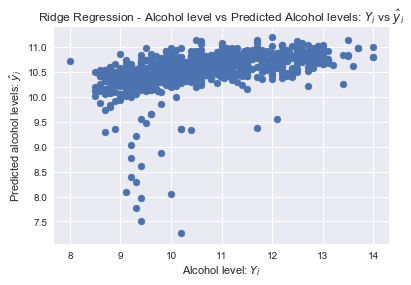

In [41]:
#y_pred = ridge.predict(X_testpoly)

plt.scatter(Y_testpoly, y_pred)
plt.xlabel("Alcohol level: $Y_i$")
plt.ylabel("Predicted alcohol levels: $\hat{y}_i$")
plt.title("Ridge Regression - Alcohol level vs Predicted Alcohol levels: $Y_i$ vs $\hat{y}_i$")

In [42]:
rmse = np.sqrt(metrics.mean_squared_error(Y_testpoly, y_pred))
rmse

1.0999751100862787

The rmse is reduced, therefore regularization did had a effect on our model.

Now lets begin with logistic regression. 
For that we deduced the quality column as 0 and 1 by classifying the 0-5 quality wine as bad or 0, and 6-10 quality wines as good or 1, hence making our dataset catagorical.

### Logistic Regression

In [43]:
df.quality = df.quality.replace({1: 0,2: 0,3:0,4:0,5:0,6:1,7:1,8:1,9:1,10:1})

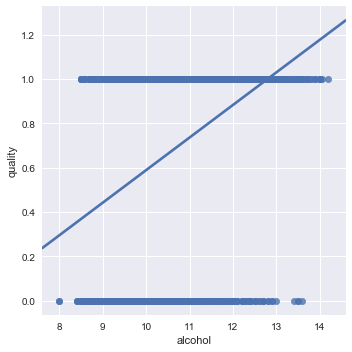

In [44]:
sns.lmplot(x='alcohol', y='quality', data=df, ci=None)

In [45]:
#data formating ID is a non-informative column
df = df.drop("free_sulfur_dioxide", 1)
df = df.drop("citric_acid", 1)
df = df.drop("density", 1)
df.head()

,fixed_acidity,volatile_acidity,residual_sugar,chlorides,total_sulfur_dioxide,pH,sulphates,alcohol,quality
0,7.0,0.27,20.7,0.045,170.0,3.00,0.45,8.8,1
1,6.3,0.30,1.6,0.049,132.0,3.30,0.49,9.5,1
2,8.1,0.28,6.9,0.050,97.0,3.26,0.44,10.1,1
3,7.2,0.23,8.5,0.058,186.0,3.19,0.40,9.9,1
4,7.2,0.23,8.5,0.058,186.0,3.19,0.40,9.9,1


We will drop free sulfur dioxide, citric acid and density as they have insignificant effect on our cassifying variable quality, therefore we removed these columns and display the remaining column relation in the below heat map.

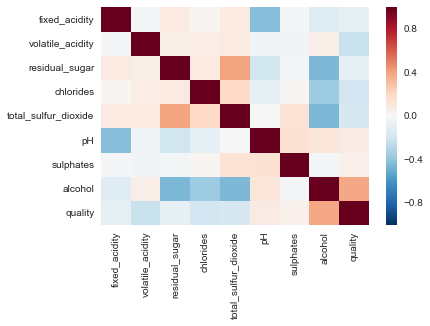

In [46]:
sns.heatmap(df.corr())
plt.show()

The above heat map shows independence abong the independent variable i.e lack of multi-colinearity

In [47]:
#df.fixed_acidity = df.fixed_acidity.astype(int)
X = df[["residual_sugar","pH","alcohol"]].values
y = df[["quality"]].values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .20, random_state=0)

from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
classifier.score(X_test,y_test)

0.67346938775510201

The logistic regression model fit the dataset and the score is 0.67

In [49]:
y_pred=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[110 245]
 [ 75 550]]


The confusion matrix result is telling us that we have 119+539 correct predictions and 86+236 incorrect predictions.

In [50]:
log_rmse =np.sqrt(metrics.mean_squared_error(Y_testpoly, y_pred))
log_rmse

9.742370087439447

the rmse is 9.7, lets perform a K fold validation with 5 folds to test our model.

### Accuracy and Cross Validation

In [51]:
from sklearn.cross_validation import KFold, cross_val_score, train_test_split

kf = KFold(len(X), n_folds=5)
for train,test in kf:
    print (train)
    print (test)

[ 980  981  982 ..., 4895 4896 4897]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 2

In [52]:
scores = []
for train, test in kf:
    classifier.fit(X[train],y[train])
    scores.append(np.sqrt(metrics.mean_squared_error(y[test], classifier.predict(X[test]))))
scores

[0.61112141817735532,
 0.57410089421171773,
 0.58466805513374642,
 0.50432248061485818,
 0.54332235628550407]

In [53]:
np.mean(scores)

0.56350704088463632

In [54]:
np.median(scores)

0.57410089421171773

In [55]:
np.std(scores)

0.036707985082359389

In [56]:
def show_stats(m, ncv, cv):
  print('Method: %s' %m)
  print('RMSE on no CV training: %.3f' %ncv)
  print('RMSE on 5-fold CV: %.3f' %cv)
show_stats('Simple Linear Regression',log_rmse ,np.mean(scores))

Method: Simple Linear Regression
RMSE on no CV training: 9.742
RMSE on 5-fold CV: 0.564


the rmse on 5 fold cross validation is 0.56, that means it greatly reduced the error from out model and increased its accuracy.